**Bienvenue dans le Notebook_predict.**  

Après avoir étudié, nettoyé la donnée et créé une premier modèle prédictif pour savoir si les clients bancaires peuvent oui ou non avoir un crédit, nous testons ici ses performances.  

Le modèle a été sauvegardé dans un pickle.  

Les étapes effectuées pour la création du modèle sont essentiellement contenues dans le pickle, hormis quelques unes qu'il faut reproduire (suivre les étapes décrites en commentaire dans ce notebook)  


In [20]:
###### IMPORT ALL LIBRARIES ######

### basic imports ###
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Pickle ###
import pickle

### Import all libraries for Pipeline ###

### Pipeline : imblearn ###
from imblearn.pipeline import Pipeline as imbpipeline
### Feature selection ###
from sklearn.model_selection import train_test_split, cross_validate

### For see the Results ###
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
###### IMPORT THE DATA ######
df = pd.read_csv("data/application_train.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
###### DROP MISSING VALUES ######
df.dropna(inplace=True)

In [4]:
###### DEFINE X y AND SPLIT TRAIN/TEST ######
X = df.drop('TARGET', axis=1)
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [5]:
###### SEPARATE TYPE COLUMNS ######
categorials = list(X_train.select_dtypes('object').columns)
numericals = list(X_train.select_dtypes(exclude=['object']).columns)

In [13]:
###### IMPORT THE MODEL WITH PICKLE ######
my_model = pickle.load(open("model.pkl","rb"))

In [14]:
###### CELL TO TEST THE MODEL ######
results = cross_validate(my_model, X_train, y_train, return_train_score=True)
results

In [16]:
###### CELL FOR USE PREDICT ######
y_pred = my_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [17]:
###### THE PREDICTIONS ######
my_model = pd.DataFrame()
my_model['Real_Value'] = y_test
my_model['Prediction_Value'] = y_pred
my_model

,Real_Value,Prediction_Value
211086,0,0
152765,0,1
219787,1,0
296216,0,0
197268,0,0
...,...,...
114943,0,0
25420,0,0
16724,0,1
223339,0,0


In [23]:
###### SCORE ######
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      2032
           1       0.11      0.36      0.16       119

    accuracy                           0.80      2151
   macro avg       0.53      0.59      0.52      2151
weighted avg       0.91      0.80      0.84      2151



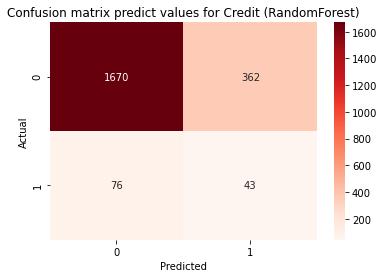

In [22]:
###### CONFUSION MATRIX ######
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion matrix predict values for Credit (RandomForest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()